In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')




In [43]:
# 파일 불러오기 

df1 = pd.read_csv("../ml/datasets/해커톤/raw_data2.csv", encoding='cp949')
# df1.info()
df1 = df1.replace(',', '')
df1['달러원종가'] = pd.to_numeric(df1['달러원종가'], errors='ignore')
df1['달러원시가'] = pd.to_numeric(df1['달러원시가'], errors='ignore')
df1['달러인덱스'] = pd.to_numeric(df1['달러인덱스'], errors='ignore')

In [67]:
# 전처리 하기 
# df2 =pd.merge(df1,df,how='inner',on='날짜')
df2=pd.read_csv("../ml/datasets/해커톤/raw_data_joo.csv",encoding='euc-kr')
df2['달러원종가'] = df2['달러원종가'].replace(',', '')
df2['달러원시가'] = df2['달러원시가'].replace(',', '')

# df2.info()

# df2['달러원시가']=df2['달러원시가'].astype('float')
df2['콜금리']=df2['콜금리'].astype('float')

# df2['달러인덱스']=df2['달러인덱스'].astype('float')
# df2['BIR']=df2['BIR'].astype('float')

for i in df2.index:
    if df2.loc[i,'달러인덱스'] == '.':
        df2.loc[i,'달러인덱스'] = np.nan

for i in df2.index:
    if df2.loc[i,'BIR'] == '.':
        df2.loc[i,'BIR'] = np.nan

df2.isna().sum()

날짜        0
달러원종가     0
달러원시가     0
CD91      0
WTI가      0
달러위안화     0
달러엔       0
달러인덱스    91
유로달러      0
유로인덱스     0
콜금리       0
코스피종가     1
BIR      64
dtype: int64

In [84]:
# df2['콜금리']=df2['콜금리'].astype('float')

df2['달러인덱스']=df2['달러인덱스'].astype('float')
df2['달러인덱스'] = df2['달러인덱스'].fillna(method='bfill')

df2['BIR']=df2['BIR'].astype('float')
df2['BIR'] = df2['BIR'].fillna(method='bfill')
df2['코스피종가'] = df2['코스피종가'].fillna(method='bfill')

#df2['달러원시가']=df2['달러원시가'].astype('float')
# df2['달러원종가']=df2['달러원종가'].astype('float')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3318 non-null   object 
 1   달러원종가   3318 non-null   float64
 2   달러원시가   3318 non-null   float64
 3   CD91    3318 non-null   float64
 4   WTI가    3318 non-null   float64
 5   달러위안화   3318 non-null   float64
 6   달러엔     3318 non-null   float64
 7   달러인덱스   3318 non-null   float64
 8   유로달러    3318 non-null   float64
 9   유로인덱스   3318 non-null   float64
 10  콜금리     3318 non-null   float64
 11  코스피종가   3318 non-null   float64
 12  BIR     3318 non-null   float64
dtypes: float64(12), object(1)
memory usage: 337.1+ KB


<Axes: >

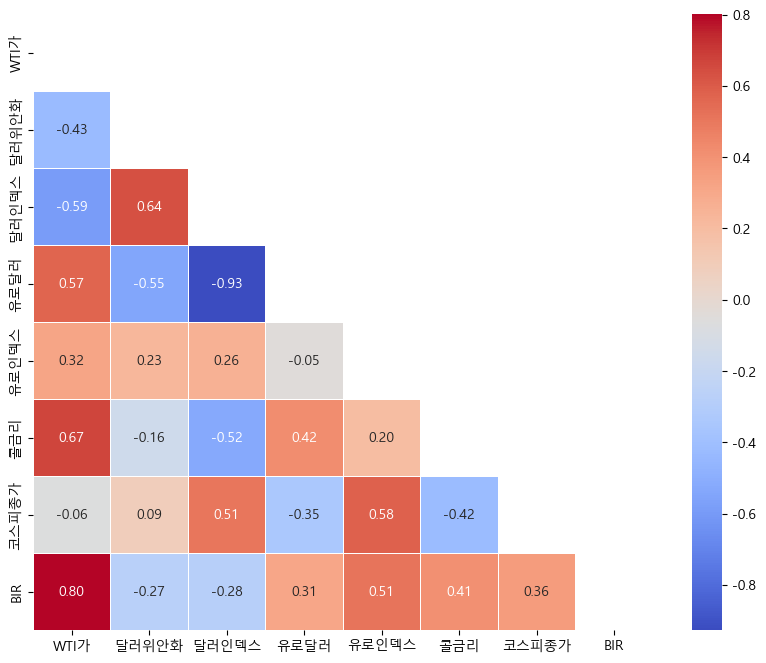

In [263]:
# 변수에 따라서 다중공정성없애기 
# 다중공정성으로 CD 91물, 달러엔 제외 
corr_data = df2[[ 'WTI가', '달러위안화',  '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']].corr()
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_data, dtype=bool))

sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', mask=mask)



In [183]:
# 달러원 종가와 상관관계 높은것이 피쳐셀렉에 논리적인가오ㅛ? 

corr_data = df2[['달러원종가', 'CD91', 'WTI가', '달러위안화', '달러엔', '달러인덱스', '유로달러',
       '유로인덱스', '콜금리', '코스피종가', 'BIR']]

np.abs(corr_data.corr()['달러원종가']).sort_values(ascending=False)




달러원종가    1.000000
달러위안화    0.660879
유로달러     0.651892
달러인덱스    0.633140
달러엔      0.595101
유로인덱스    0.481935
코스피종가    0.196201
CD91     0.146141
WTI가     0.120356
콜금리      0.093491
BIR      0.014383
Name: 달러원종가, dtype: float64

<Axes: >

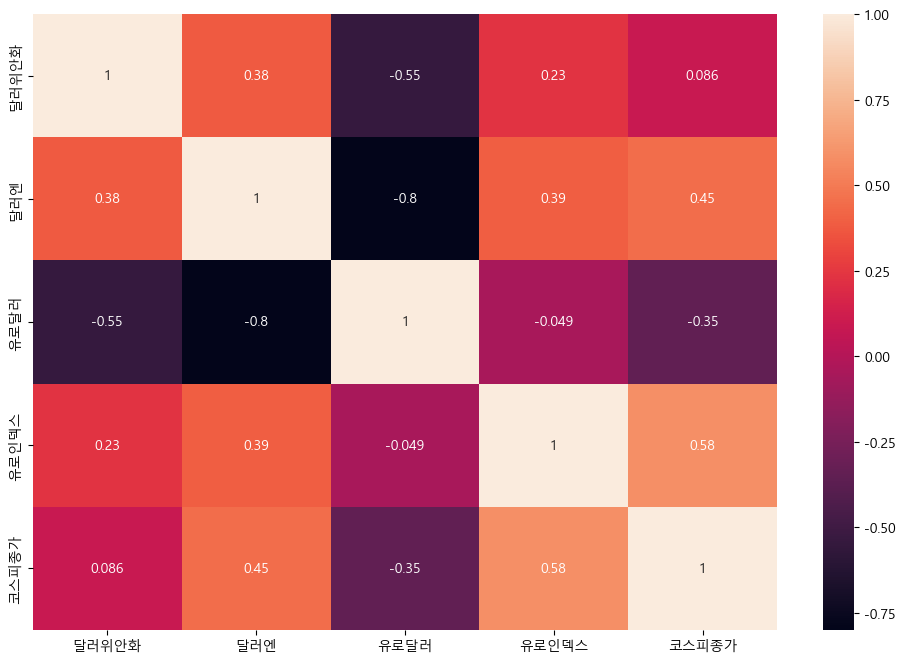

In [266]:
# 변수 6개만 선택하기 + 스켈링하기 + 단위근 조정하기 (Minmax scaler ) 
corr_data = df2[[ '달러위안화',   '유로달러','달러인덱스'
       '유로인덱스','코스피종가' ]]

plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(), annot=True)

# from sklearn.preprocessing import MinMaxScaler
# minmax_scaler = MinMaxScaler()
# minmax_scaler.fit(corr_data)
# minmax_scaled_data = minmax_scaler.transform(corr_data)
# minmax_scaled_df = pd.DataFrame(data=minmax_scaled_data, columns=corr_data.columns )
# minmax_scaled_df.describe


In [239]:
from sklearn.preprocessing import StandardScaler

Standard_Scaler = StandardScaler()
Standard_Scaler.fit(corr_data)
Standard_Scaled_data = Standard_Scaler.transform(corr_data)
Standard_Scaled_df = pd.DataFrame(data=Standard_Scaled_data, columns=corr_data.columns)
Standard_Scaled_df.describe()

# weight: [ 1.03691204  0.12470911  0.13843903 -0.27187524 -0.31934538 -1.24699102
#  0.67207078 -0.88829846 -0.24143534 -0.11441595]
# bias: 0.0013727852680168876
# 선형회귀 모델 R2: 0.86

,달러위안화,달러엔,달러인덱스,유로달러,유로인덱스
count,3.318000e+03,3.318000e+03,3.318000e+03,3.318000e+03,3.318000e+03
mean,-3.631948e-15,-4.796913e-16,7.538006e-16,-4.111640e-16,1.370547e-16
std,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00,1.000151e+00
min,-1.732227e+00,-1.850487e+00,-1.839387e+00,-2.110682e+00,-1.621592e+00
25%,-8.173211e-01,-5.090529e-01,-1.125926e+00,-7.932213e-01,-6.487459e-01
50%,-9.911340e-02,1.274293e-01,3.996710e-01,-2.287831e-01,-2.325241e-01
75%,8.148221e-01,4.401535e-01,7.863526e-01,9.180747e-01,4.285014e-01
max,2.479317e+00,2.642826e+00,1.891700e+00,2.482011e+00,3.069557e+00


In [241]:
from sklearn.model_selection import train_test_split
y= df2['달러원종가']
X=Standard_Scaled_df


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [244]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print('weight:', lr_model.coef_)
print('bias:', lr_model.intercept_)
# 이건 뭐에 대한 score 인가?? 
score =lr_model.score(X_test, y_test)

print('선형회귀 모델 R2: {0:.2f}'.format(score))
score

weight: [  32.15365063   -5.55107696  -76.77573688 -103.71669271   44.47035019]
bias: 1150.2392556239588
선형회귀 모델 R2: 0.80


0.7978963830730377

In [245]:
# Cofficient 값을 버리고, 부호만 살리는건 어때요??
coef=pd.Series(data=np.round(lr_model.coef_,5), index=X.columns)
coef

달러위안화     32.15365
달러엔       -5.55108
달러인덱스    -76.77574
유로달러    -103.71669
유로인덱스     44.47035
dtype: float64

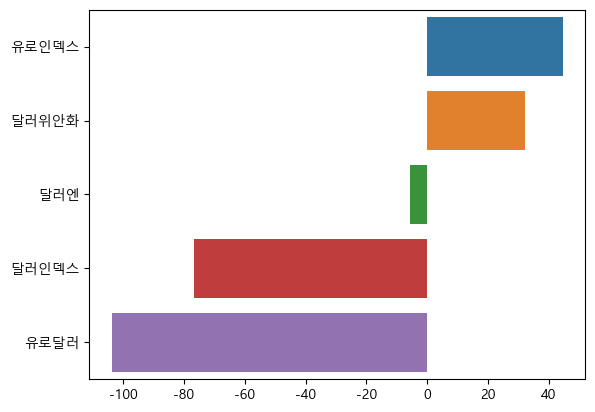

In [255]:
# 이 시각화는 왜 이모냥인겁니까?? 
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.show()

In [247]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:3f}, RMSE:{1:.3f}, r2:{2:.3f}'.format(mse,rmse,r2))

y_pred=lr_model.predict(X_test)
printRegressorResult(y_test,y_pred)

MSE:1114.204126, RMSE:33.380, r2:0.798


In [256]:
result=pd.DataFrame({'y':y_test.values,'y_pred':y_pred, 'diff':np.abs(y_test.values-y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
333,1114.05,1022.85,91.20
355,1095.19,1009.60,85.59
31,1123.04,1201.33,78.29
307,1211.50,1146.50,65.00
572,1137.01,1201.33,64.32
...,...,...,...
851,1319.11,1319.13,0.02
714,1339.15,1339.17,0.02
616,1100.11,1100.12,0.01
6,1088.50,1088.50,0.00


<Axes: >

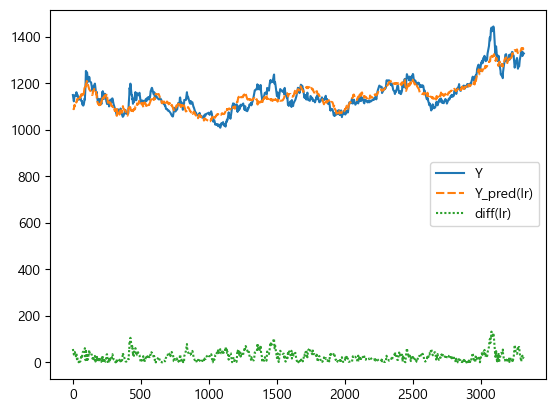

In [257]:
# 에측결과 시각화, 왜 에러가 날까요??
y_pred = lr_model.predict(X_test)
lr_df = pd.DataFrame(data={'Y':y_test, 'Y_pred(lr)':y_pred,'diff(lr)':np.round(np.abs(y_test-y_pred),2)})
sns.lineplot(data=lr_df)

In [259]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score=tree_model.score(X_test,y_test)
print('의사결정회귀 R2: {0:.2f}'.format(score))

의사결정회귀 R2: 0.97


In [260]:
y_pred = tree_model.predict(X_test)

tree_df = pd.DataFrame(data = {'Y': y_test, 'Y_pred(tree)':y_pred, 'diff(tree)':np.round(np.abs(y_test-y_pred),2)} )
tree_df.sort_values(by=['diff(tree)'],ascending=False).head(10)

,Y,Y_pred(tree),diff(tree)
818,1114.05,1022.85,91.20
746,1095.19,1009.60,85.59
1392,1123.04,1201.33,78.29
109,1211.50,1146.50,65.00
1391,1137.01,1201.33,64.32
1114,1017.60,1073.50,55.90
1557,1171.95,1117.00,54.95
100,1199.00,1153.25,45.75
1586,1115.27,1159.45,44.18
734,1057.57,1101.61,44.04


<Axes: >

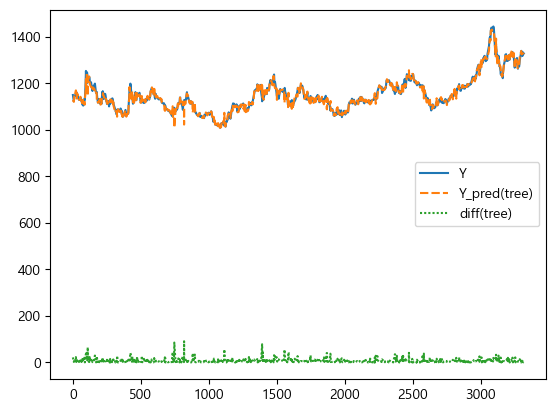

In [261]:
# 이거 PPT 에 사용하면 좋겠슴당!! 
sns.lineplot(data=tree_df)

In [144]:
!pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.1/99.7 MB 2.8 MB/s eta 0:00:36
                                              0.3/99.7 MB 3.5 MB/s eta 0:00:29
                                              0.5/99.7 MB 4.0 MB/s eta 0:00:25
                                              0.7/99.7 MB 4.1 MB/s eta 0:00:25
                                              0.7/99.7 MB 3.4 MB/s eta 0:00:30
                                              0.9/99.7 MB 3.5 MB/s eta 0:00:29
                                              1.1/99.7 MB 3.4 MB/s eta 0:00:30
                                              1.1/99.7 MB 3.1 MB/s eta 0:00:32
                                              1.2/99.7 MB 2.9 MB/s eta 0:00:34
                                              1.4/99.7 MB 3.0 MB/s eta 0:00:34
                                              1.6/99.7 MB 3.1 MB/s eta 0:00:32
                                              1.7/99.7 MB 3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [253]:
# 이건 왜 다 같은 값이 나올까요?? 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_name = model.__class__,__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name,score))


(<class 'sklearn.ensemble._forest.RandomForestRegressor'>, '__main__') 모델 R2: 0.98
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 5
[LightGBM] [Info] Start training from score 1150.589710
(<class 'lightgbm.sklearn.LGBMRegressor'>, '__main__') 모델 R2: 0.98
(<class 'xgboost.sklearn.XGBRegressor'>, '__main__') 모델 R2: 0.98


In [224]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test, y_pred)
    print('MSE:{0:.3f}, RMSE:{1,.3f}, r2:{2,.3f}'.format(mse, rmse, r2))

In [227]:
# 이건 왜 에러가 날까요?
model_list=[lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)
    print('{0} 모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)

LinearRegression 모델


KeyError: '1,'

In [228]:
from sklearn.feature_selection import SelectKBest, f_regression

X_selected=SelectKBest(score_func= f_regression, k=5)
X_selected.fit_transform(X,y)
features = X.columns[X_selected.get_support()]
print('features={}'.format(features))

corr_features = corr_data[['달러위안화', '달러엔', '달러인덱스', '유로달러']]

features=Index(['달러위안화', '달러엔', '달러인덱스', '유로달러', '유로인덱스'], dtype='object')


In [229]:
X_selected=corr_features
X_train, X_test, y_train, y_test= train_test_split(X_selected,y,test_size=0.3, random_state=42)
lr_model2=LinearRegression()
lr_model2.fit(X_train, y_train)

y_pred = lr_model2.predict(X_test)
printRegressorResult(y_test,y_pred)

# 왜 점수가 요렇게 나오까요? 

KeyError: '1,'

In [230]:
# polynomialFeatures() 사용하여 2차원 다항회귀모델

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_selected)
X_train, X_test, y_train, y_test=train_test_split(X_poly, y, test_size=0.3, random_state=42)

poly_model=LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
printRegressorResult(y_test, y_pred)

KeyError: '1,'

In [231]:
# 데이터 전처리 

from sklearn.preprocessing import StandardScaler
X_selected_scaled = StandardScaler().fit_transform(X_selected)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

lr_model3=LinearRegression()
lr_model3.fit(X_train, y_train)

y_pred = lr_model3.predict(X_test)
printRegressorResult(y_test,y_pred)

KeyError: '1,'

달러위안화    0.235589
달러엔      0.093620
달러인덱스   -0.316478
유로달러     0.423204
dtype: float64


KeyError: '0,'

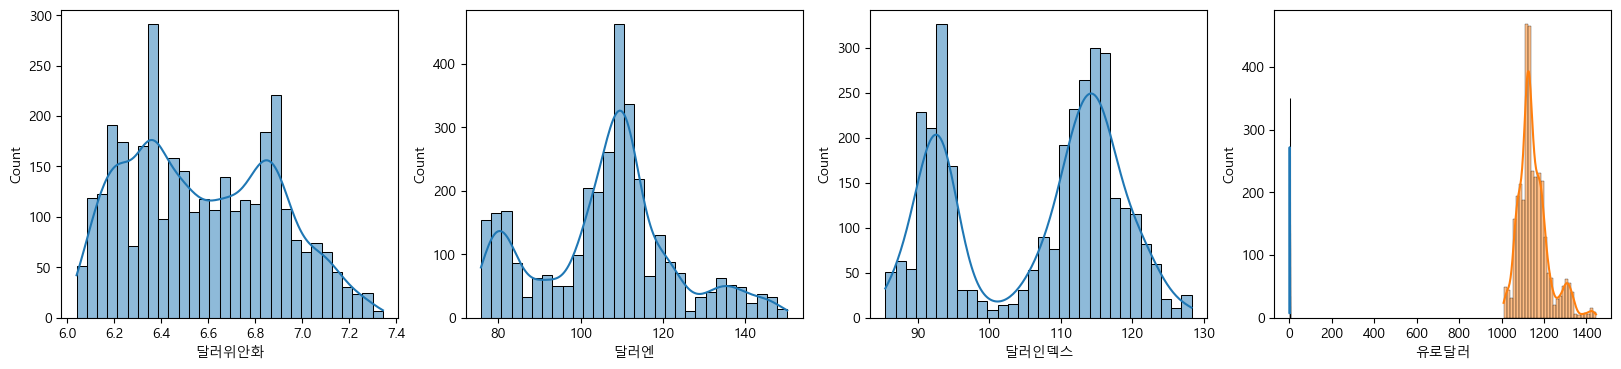

In [232]:
# 데이터 분포 확인- 히스토그램 
nrows=1
ncols=4

fig,axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=X_selected.columns[3], data=X_selected, kde=True, bins=30, ax=axs[3])


sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0,.2f}'.format(y.skew()))

달러위안화    0.235589
달러엔      0.093620
달러인덱스   -0.316478
유로달러     0.353777
dtype: float64

달러원종가:0.93


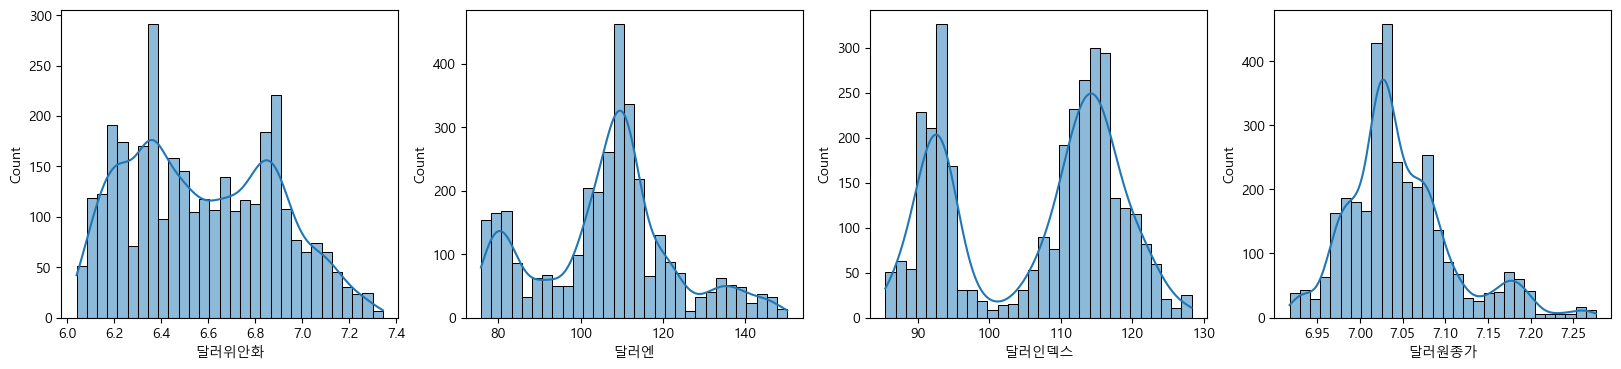

In [233]:
# 로그연산 유로달러 해보기 
X_selected['유로달러']=np.log1p(X_selected['유로달러'])
y=np.log1p(y)

# 데이터분포확인 - 히스토그램 
nrows=1
ncols=4

fig, axs=plt.subplots(nrows, ncols)
fig.set_size_inches(20,4)

sns.histplot(x=X_selected.columns[0], data=X_selected, kde=True, bins=30, ax=axs[0])
sns.histplot(x=X_selected.columns[1], data=X_selected, kde=True, bins=30, ax=axs[1])
sns.histplot(x=X_selected.columns[2], data=X_selected, kde=True, bins=30, ax=axs[2])
sns.histplot(x=y, data=y, kde=True, bins=30, ax=axs[3])

print(X_selected.skew())
print('\n달러원종가:{0:.2f}'.format(y.skew()))

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,y,test_size=0.3, random_state=42)

lr_model4= LinearRegression()
lr_model4.fit(X_train, y_train)

y_pred= lr_model4.predict(X_test)
mse=mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse=np.sqrt(mse)
r2=r2_score(np.expm1(y_test), np.expm1(y_pred))
print('MSE : {0:.3f}, RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse, rmse, r2))

MSE : 2086.319, RMSE : 45.676, r2 : 0.622


In [235]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_model, X, y, scoring='neg_mean_squared_error', cv=3, return_train_score=True, return_estimator=True)
print('Scores', scores)

mse=(-1*scores['train_score'])
print('MSE:', mse)

rmse=np.sqrt(-1*scores['train_score'])
print('RMSE:', rmse)

print('RMSE 평균:{0:.3f}'.format(np.mean(rmse)))

Scores {'fit_time': array([0.00199628, 0.0010159 , 0.0020287 ]), 'score_time': array([0.00099683, 0.00105166, 0.0010047 ]), 'estimator': [LinearRegression(), LinearRegression(), LinearRegression()], 'test_score': array([-0.02131059, -0.00137995, -0.04776105]), 'train_score': array([-0.00045115, -0.00064761, -0.00070677])}
MSE: [0.00045115 0.00064761 0.00070677]
RMSE: [0.02124022 0.02544816 0.02658524]
RMSE 평균:0.024


In [236]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [252]:
!pip install lightgbm


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/1.3 MB ? eta -:--:--
     ---------------                          0.5/1.3 MB 15.9 MB/s eta 0:00:01
     --------------------------------         1.1/1.3 MB 13.7 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 12.0 MB/s eta 0:00:00


In [237]:
from lightgbm import LGBMRegressor

lgb_model=LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986


LGBMRegressor(random_state=42)

In [238]:
model_list=[lr_model, forest_model, lgb_model]

for model in model_list:
    model.fit(X_train, y_train)
    y_preds=model.predict(X_test)
    mse=mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2=r2_score(y_test, y_preds)
    model_name=model.__class__.__name__
    print('{0} MSE:{1:.3f}, RMSE:{2:.3f}, r2:{3:.3f}'.format(model_name, mse, rmse,r2))

LinearRegression MSE:0.002, RMSE:0.039, r2:0.611
RandomForestRegressor MSE:0.000, RMSE:0.008, r2:0.982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 4
[LightGBM] [Info] Start training from score 7.046986
LGBMRegressor MSE:0.000, RMSE:0.009, r2:0.977
